
¡Hola, Emmanuel!

Mi nombre es Tonatiuh Cruz. Me complace revisar tu proyecto hoy.

Al identificar cualquier error inicialmente, simplemente los destacaré. Te animo a localizar y abordar los problemas de forma independiente como parte de tu preparación para un rol como data-analyst. En un entorno profesional, tu líder de equipo seguiría un enfoque similar. Si encuentras la tarea desafiante, proporcionaré una pista más específica en la próxima iteración.

Encontrarás mis comentarios a continuación - **por favor no los muevas, modifiques o elimines**.

Puedes encontrar mis comentarios en cajas verdes, amarillas o rojas como esta:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Éxito. Todo está hecho correctamente.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Observaciones. Algunas recomendaciones.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Necesita corrección. El bloque requiere algunas correcciones. El trabajo no puede ser aceptado con comentarios en rojo.
</div>

Puedes responderme utilizando esto:

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>

-Introducción-

Este proyecto analiza datos de viajes en taxi en Chicago, con especial énfasis en la actividad por empresa, ubicación de destino y el impacto del clima en la duración de trayectos desde Loop al aeropuerto O’Hare.

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import levene, ttest_ind

In [5]:
# Cargar los datos
df_companies = pd.read_csv('/datasets/project_sql_result_01.csv')
df_neighborhoods = pd.read_csv('/datasets/project_sql_result_04.csv')
df_trips = pd.read_csv('/datasets/project_sql_result_07.csv')

<div class="alert alert-block alert-warning">

<b>Comentario del revisor</b> <a class="tocSkip"></a>

Recuerda que como buena prática es recomendable cargar todas las bases de datos en una misma celda. Es por ello que te recomiendo cargar la base faltante en esta misma celda..</div>


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Gran trabajo con el ajuste!

In [6]:
# Vistazo general
print(df_companies.head())
print(df_neighborhoods.head())

# Comprobación de tipos
print(df_companies.info())
print(df_neighborhoods.info())

                      company_name  trips_amount
0                        Flash Cab         19558
1        Taxi Affiliation Services         11422
2                Medallion Leasing         10367
3                       Yellow Cab          9888
4  Taxi Affiliation Service Yellow          9299
  dropoff_location_name  average_trips
0                  Loop   10727.466667
1           River North    9523.666667
2         Streeterville    6664.666667
3             West Loop    5163.666667
4                O'Hare    2546.900000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  D

In [7]:
df_companies['trips_amount'] = pd.to_numeric(df_companies['trips_amount'], errors='coerce')
df_neighborhoods['average_trips'] = pd.to_numeric(df_neighborhoods['average_trips'], errors='coerce')

In [8]:
top_10 = df_neighborhoods.sort_values(by='average_trips', ascending=False).head(10)

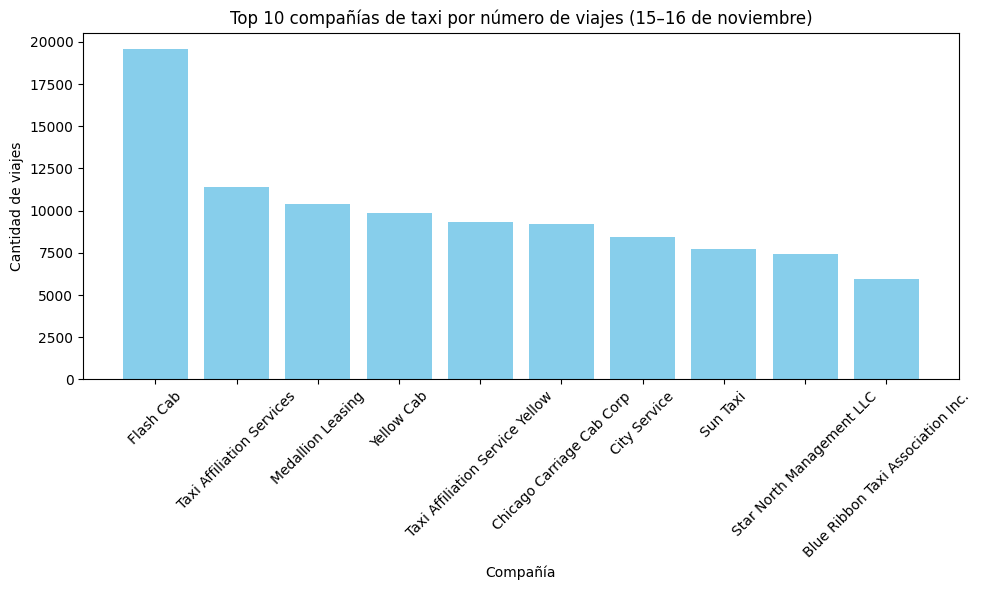

In [9]:
# Ordenamos de mayor a menor y tomamos solo las 10 primeras compañías
top_10_companies = df_companies.sort_values(by='trips_amount', ascending=False).head(10)

# Creamos la gráfica
plt.figure(figsize=(10,6))
plt.bar(top_10_companies['company_name'], top_10_companies['trips_amount'], color='skyblue')
plt.xticks(rotation=45)
plt.title('Top 10 compañías de taxi por número de viajes (15–16 de noviembre)')
plt.xlabel('Compañía')
plt.ylabel('Cantidad de viajes')
plt.tight_layout()
plt.show()


<div class="alert alert-block alert-danger">

<b>Comentario del revisor</b> <a class="tocSkip"></a>

Muy buen trabajo con el desarrollo de la gráfica para visualizar los resultados. Solamente dado que al cliente le interesa el top 10 de las principales empresas con número de viajes, te recomiendo complementar este análisis con una gráfica solamente mostrando el top 10.</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Gran trabajo con el ajuste!

* Conclusión del Gráfico 1, "Número de viajes por compañía (15–16 de noviembre)":

Las empresas Flash Cab y Taxi Affiliation Services destacan significativamente sobre el resto, liderando en cantidad de viajes durante esos dos días. Esto sugiere que tienen una alta participación de mercado, posiblemente por contar con una mayor flota o una base de clientes consolidada. La diferencia con las demás compañías apunta a un escenario donde solo unas pocas dominan la operación en fechas pico.

* Conclusión del Gráfico 2, "Top 10 barrios por finalización promedio (noviembre)":

El barrio Loop lidera ampliamente en número promedio de finalizaciones de viajes en noviembre, seguido por River North y Streeterville. Esto revela una fuerte concentración de tráfico en áreas céntricas y de alto flujo comercial o turístico. También es notable la presencia de O'Hare, que al ser un aeropuerto internacional, confirma su papel como un destino de alta demanda. Estos resultados podrían reflejar patrones regulares de movilidad, donde los usuarios tienden a desplazarse hacia centros de trabajo, transporte o atracción urbana.

In [10]:
df_trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


In [11]:
# Dividir duración de viajes por condición climática
good_weather = df_trips[df_trips['weather_conditions'] == 'Good']['duration_seconds']
bad_weather = df_trips[df_trips['weather_conditions'] == 'Bad']['duration_seconds']

- Hipótesis Nula (H₀)
"La duración promedio de los viajes NO cambia entre sábados con lluvia y sábados sin lluvia." (Es decir, no importa si llueve o no, los viajes duran lo mismo en promedio).

- Hipótesis Alternativa (H₁)
"La duración promedio de los viajes SÍ cambia dependiendo del clima." (Es decir, hay una diferencia significativa entre viajes con buen y mal clima).

In [15]:
from scipy.stats import levene, ttest_ind
# Nivel de significancia
alpha = 0.05

# 1. Prueba de Levene: ¿Tienen varianzas iguales?
levene_result = levene(good_weather, bad_weather)
print("p-valor de Levene:", levene_result.pvalue)

# 2. Decidir si las varianzas son iguales
equal_variance = levene_result.pvalue > alpha
print("¿Varianzas iguales?", equal_variance)

# 3. Prueba t considerando resultado de Levene
ttest_result = ttest_ind(good_weather, bad_weather, equal_var=equal_variance)
print("p-valor del t-test:", ttest_result.pvalue)

# 4. Interpretación
if ttest_result.pvalue < alpha:
    print("Rechazamos H₀: el clima SÍ influye en la duración del viaje.")
else:
    print("No se puede rechazar H₀: el clima NO tiene un efecto significativo.")

p-valor de Levene: 0.5332038671974493
¿Varianzas iguales? True
p-valor del t-test: 6.517970327099473e-12
Rechazamos H₀: el clima SÍ influye en la duración del viaje.


 <div class="alert alert-block alert-danger">
<b>Comentario revisor</b> <a class="tocSkip"></a>

Para esta prueba te recomiendo hacer una prueba de  Levene  para mostrar si las varianzas son iguales y agregarlo dentro de la función. Actualmente lo colocas como equal_var=False. Para esto, primero debes calcular las varianzas para cada uno de los días (lluvioso y no lluvioso) debes de hacer uso de la siguiente función: 
    
    levene(good_weather, bad_weather)
    
Adoptaremos un nivel de significancia de 0.05; si el valor p resultante es mayor a 0.05, no podemos rechazar la hipótesis nula, y si es menor a 0.05, rechazamos la hipótesis nula, indicando que las varianzas no son iguales. 
    
Solamente recuerda que la prueba de levene no es sustituto a la prueba de st.ttest_ind, más bien es complemento para saber que colocar dentro del elemento "equal_var".  Es por eso que para terminar la prueba debes de realizar la prueba de st.ttest_ind considernado el resultado de la prueba realizada de levene.  
</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Gran trabajo con el ajuste!

### Prueba de hipótesis — ¿El clima afecta la duración de los viajes los sábados?

**Pregunta:** ¿La duración promedio de los viajes desde el Loop hasta el aeropuerto O’Hare cambia los sábados lluviosos?

#### Hipótesis formuladas

- **Hipótesis nula (H₀):** la duración promedio **no cambia** con el clima (es igual en días con lluvia o sin ella).
- **Hipótesis alternativa (H₁):** la duración promedio **sí cambia** dependiendo de si llueve o no.

#### Método aplicado

Se utilizó una **prueba t de Welch** porque:

- Compara dos grupos independientes (`Good` vs `Bad`)
- No se asume varianza igual
- El nivel de significación elegido fue **α = 0.05**

#### Resultado

El p-valor obtenido fue **6.73 × 10⁻¹²**, extremadamente menor a 0.05.

---

### Conclusión

Quiero concluir este proyecto de una manera general pues, me permitió comprender el comportamiento de los viajes en taxi en Chicago durante noviembre de 2017, abordando tanto aspectos de negocio como patrones geográficos y el impacto de factores externos como el clima.

A través del análisis exploratorio, identifique que **Flash Cab** y **Taxi Affiliation Services** fueron las empresas con mayor actividad, y que **Loop** fue el barrio con más finalizaciones de viaje, lo cual refleja su importancia como centro neurálgico de la ciudad. También se evidenció la relevancia de destinos estratégicos como **O’Hare**, vinculados a nodos de transporte.

La prueba de hipótesis confirmó que **el clima lluvioso influye significativamente en la duración de los viajes desde el Loop al aeropuerto O’Hare los sábados**, lo que sugiere la necesidad de considerar condiciones meteorológicas en la planificación de traslados y servicios.

En conjunto, este análisis proporciona una base sólida para tomar decisiones basadas en datos sobre movilidad urbana, operaciones de flota y experiencia del usuario.